# Stochastic Gradient Descent

## Introduction

I previously implemented full-batch gradient descent (see Adaline.ipynb). A problem with full-batch GD is that it is computationally expensive to run when your dataset is large. This is due to the fact that we were taking a step in the direction of the negative gradient using the entire dataset on each epoch. With SGD, the parameters are updated incrementally for each training example. 

## Algorithm

With full-batch gradient descent, the gradients were $\frac{\partial L}{\partial w_j}=-\frac{2}{n}\sum_i(y^{(i)}-\sigma(z^{(i)}))x_j^{(i)}$ and $\frac{\partial L}{\partial b}=-\frac{2}{n}\sum_i(y^{(i)}-\sigma(z^{(i)}))$. Since SGD deals with one training example at a time, the new gradients are $\frac{\partial L}{\partial w_j}=-2(y-\sigma(z))x$ and $\frac{\partial L}{\partial b}=-2(y-\sigma(z))$. The loss function for full-batch GD was $L(w,b)=\frac{1}{2n}\sum_{i=1}^n(y^{(i)}-\sigma(z^{(i)}))^2$, so for SGD it's $L(w,b)=\frac{1}{2}(y-\sigma(z))^2$.

I will now briefly explain some of the code in the implementation section to clear any potential confusion.

method shuffle: Randomly shuffles the data for each epoch to avoid repetative cycles that can emerge. This randomness is why we call this algorithm stochastic. 

method initialize_weights: Initializes weights to small random numbers. Random seed is an input so that the code is reproducible. 

method fit: This is where everything comes together. We first intialize our weights and then suffle the data. In the inner for loop, we loop through each training example in the shuffled data, and then append the loss associated with each training example. To see how well we preformed on the epoch, we compute the average loss for the epoch. 


## Implementation

In [389]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class AdalineSGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
        Bias unit after fitting.
    losses_ : list
      Mean squared error loss function value averaged over all
      training examples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self


    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float_(0.)
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

## Training

In [310]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header=None) 
df.head()


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [391]:
# filtering two species
df = df[(df.iloc[:,4]=="Iris-setosa") | (df.iloc[:,4]=="Iris-versicolor")] 
# extract sepal length and petal length so we can visualize the decision boundary
X = df.iloc[:,[0,2]].values
# Creating the two classes
y = np.where(df.iloc[:,4]=="Iris-setosa",0,1)



In [470]:
import matplotlib.pyplot as plt
# dataframe for plotting purposes
df2 = df.iloc[:,[0,2]].assign(y=y)
df2

,0,2,y
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
95,5.7,4.2,1
96,5.7,4.2,1
97,6.2,4.3,1
98,5.1,3.0,1


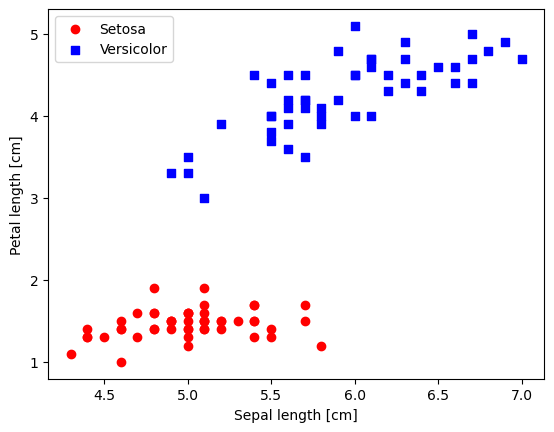

In [606]:
x1, x2, x3, x4 = df2[df2.y==0].iloc[:,0], df2[df2.y==0].iloc[:,1], df2[df2.y==1].iloc[:,0], df2[df2.y==1].iloc[:,1]

plt.scatter(x1,x2,color='red', marker='o', label='Setosa')
plt.scatter(x3,x4,color='blue', marker='s', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

plt.show()


In [608]:
# Standardizing our training set for faster convergence. 
X_std = X
for i in range(X.shape[1]):
    X_std[:,i] = (X[:,i]-X[:,i].mean())/X[:,i].std()


In [610]:
sgd = AdalineSGD(eta=0.01, n_iter=15,random_state=123)
sgd.fit(X_std, y)
sgd.losses_


[0.12763293833248818,
 0.02656674481360946,
 0.018768987758795607,
 0.015391753540770133,
 0.014057473312386652,
 0.01335424041690732,
 0.013013785303823721,
 0.012688973230756179,
 0.012615535913086012,
 0.012804725374006667,
 0.012716148162934022,
 0.012715622975530843,
 0.012724994364708588,
 0.012726745241054226,
 0.012608138842424212]

## Conclusion

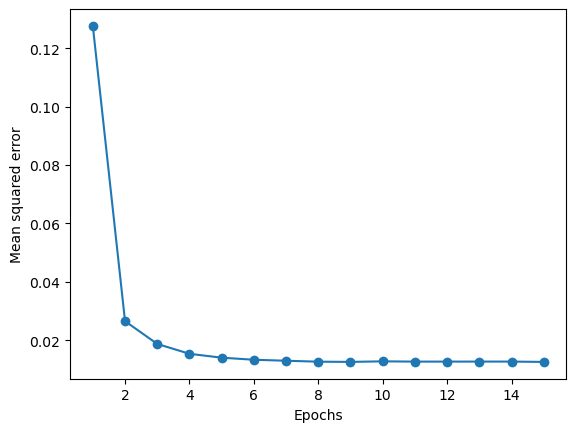

In [619]:
plt.plot(np.arange(1,len(sgd.losses_)+1),sgd.losses_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
plt.show()

We see that our average loss converges very quickly. 

In [622]:
sgd.predict(X_std)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [624]:
sum(sgd.predict(X_std)-y)

0

Therefore, we are making perfect decisions.